In [1]:
import os

# this get our current location in the file system
import inspect
HERE_PATH = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))

import random
import numpy as np

import tools
import embedding_tools

# adding openvault directory to path
import sys
openvault_path = os.path.join(HERE_PATH, '..')
sys.path.append(openvault_path)

from openvault.continuous import ContinuousLearner

from openvault_tools import SketchVaultPlayer
# from openvault_tools import SketchVaultSignal

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.ion()

In [3]:
tools.set_seed(0)

sketch_root_folder = os.path.join(HERE_PATH, 'samples')
sketch_folders = tools.list_folders(sketch_root_folder)

type1_folder = random.choice(sketch_folders)

type2_folder = random.choice(sketch_folders)
while type2_folder == type1_folder:
    type2_folder = random.choice(sketch_folders)

print(type1_folder)
print(type2_folder)

type1_files = tools.list_files(type1_folder, ['*.json'])
type2_files = tools.list_files(type2_folder, ['*.json'])

Setting seed to 0
/Users/jgrizou/workspace/sketch_features/samples/circle
/Users/jgrizou/workspace/sketch_features/samples/line_vertical


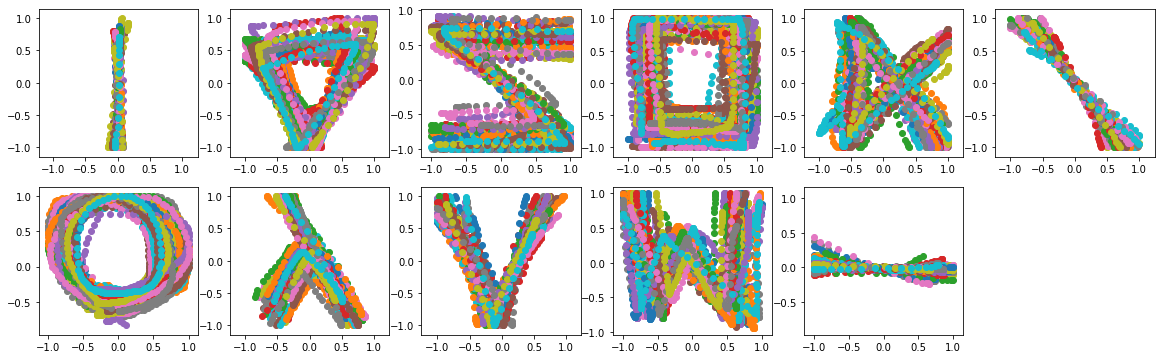

In [4]:
plt.figure(figsize=(20,6))
for i, type_folder in enumerate(sketch_folders):

    type_files = tools.list_files(type_folder, ['*.json'])

    ax = plt.subplot(2,6,i+1)
    for f in type_files:
        X = tools.read_json(f)
        scaled_X = embedding_tools.scale_drawing(X)
        plt.scatter(scaled_X[:,0], scaled_X[:,1])

        
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.axis('equal')

In [22]:
Xumap_d = []
Xumap_h = []
Xumap = []
labels = []

s_folders = [sketch_folders[1], sketch_folders[3], sketch_folders[6]]
print(s_folders)

# s_folders = sketch_folders

for i, type_folder in enumerate(s_folders):

    type_files = tools.list_files(type_folder, ['*.json'])

    for f in type_files:
        drawing = tools.read_json(f)
        scaled_drawing = embedding_tools.scale_drawing(drawing)
        
        Xumap_d.append(embedding_tools.compute_drawing_descriptors(scaled_drawing))
        Xumap_h.append(embedding_tools.compute_drawing_histogram_flatten(scaled_drawing))
        Xumap.append(embedding_tools.compute_embeddings_from_drawing(drawing))
        
        labels.append(i)

['/Users/jgrizou/workspace/sketch_features/samples/triangles', '/Users/jgrizou/workspace/sketch_features/samples/square', '/Users/jgrizou/workspace/sketch_features/samples/circle']


Setting seed to 0


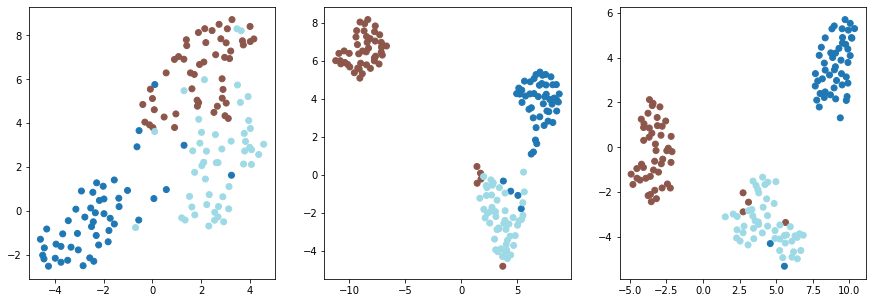

In [25]:
tools.set_seed(0)

import umap

umap_params = {
    "n_neighbors": 15,
    "min_dist": 0.5,
    "n_components": 2, 
    "metric": 'correlation'
}


embedding_d = umap.UMAP(**umap_params).fit_transform(Xumap_d)
embedding_h = umap.UMAP(**umap_params).fit_transform(Xumap_h)
embedding = umap.UMAP(**umap_params).fit_transform(Xumap)

###


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(embedding_d[:,0], embedding_d[:,1], c=labels, cmap='tab20')

plt.subplot(1,3,2)
plt.scatter(embedding_h[:,0], embedding_h[:,1], c=labels, cmap='tab20')

plt.subplot(1,3,3)
plt.scatter(embedding[:,0], embedding[:,1], c=labels, cmap='tab20')

Setting seed to 0


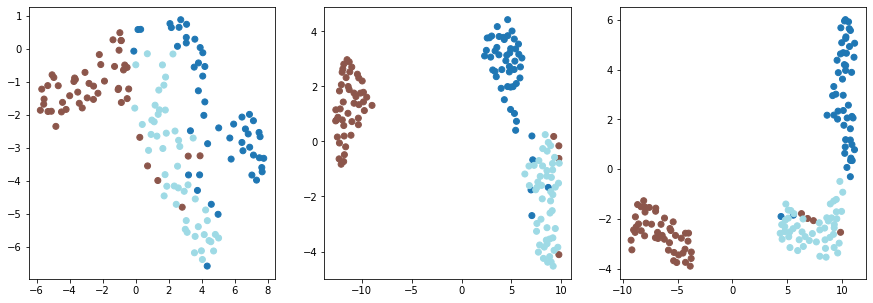

In [27]:
tools.set_seed(0)

import umap

umap_params = {
    "n_neighbors": 15,
    "min_dist": 0.5,
    "n_components": 2, 
    "metric": 'euclidean'
}


embedding_d = umap.UMAP(**umap_params).fit_transform(Xumap_d)
embedding_h = umap.UMAP(**umap_params).fit_transform(Xumap_h)
embedding = umap.UMAP(**umap_params).fit_transform(Xumap)

###


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(embedding_d[:,0], embedding_d[:,1], c=labels, cmap='tab20')

plt.subplot(1,3,2)
plt.scatter(embedding_h[:,0], embedding_h[:,1], c=labels, cmap='tab20')

plt.subplot(1,3,3)
plt.scatter(embedding[:,0], embedding[:,1], c=labels, cmap='tab20')
